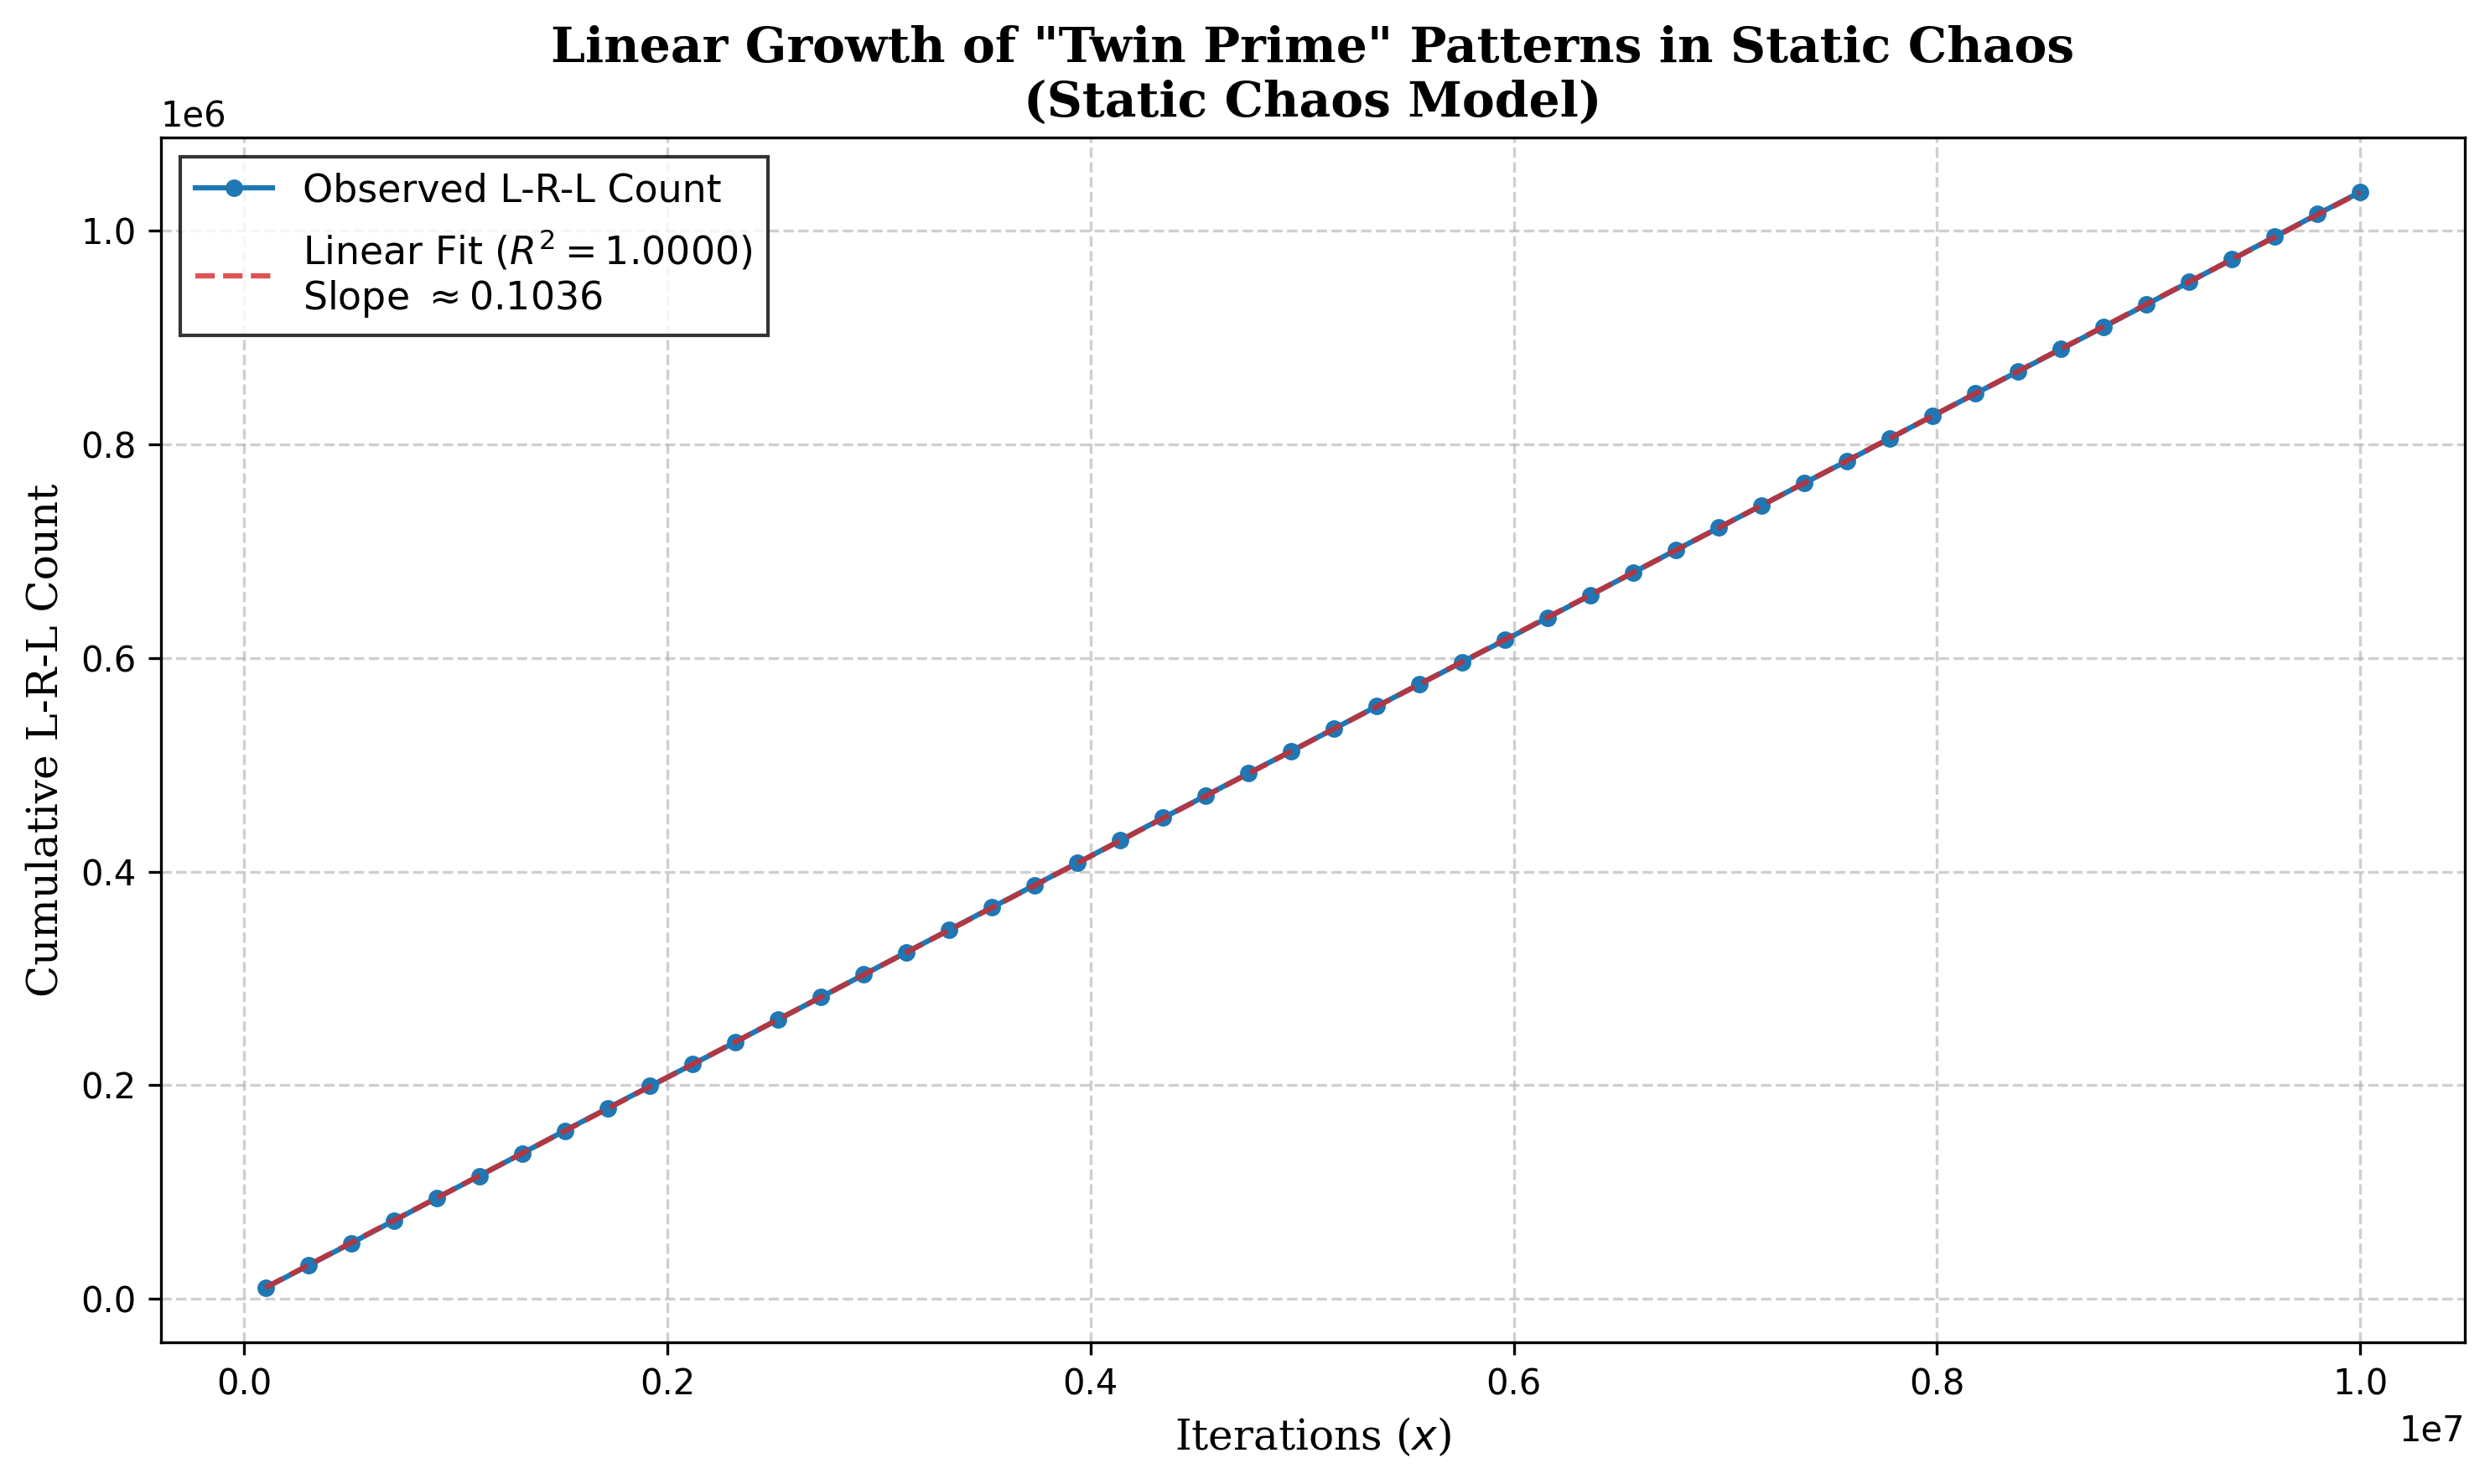

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_lrl_count_trend(max_iter=10000000):
    # 1. 参数设置
    u = 1.543689012692076
    x = 0.1
    
    # 预热
    for _ in range(10000):
        x = 1 - u * x**2

    lrl_count = 0
    history = [0, 0, 0]
    
    current_iter = 0
    # 增加采样点以获得平滑曲线 (50个点)
    checkpoints = np.linspace(100000, max_iter, 50).astype(int)
    checkpoints = np.unique(checkpoints)
    
    x_vals = []
    y_vals = [] # lrl_count

    # 2. 模拟运行
    for target in checkpoints:
        steps = target - current_iter
        
        # 批量迭代
        for _ in range(steps):
            x = 1 - u * x**2
            is_L = 1 if x < 0 else 0
            
            history.pop(0)
            history.append(is_L)
            
            if history == [1, 0, 1]:
                lrl_count += 1
        
        current_iter = target
        
        x_vals.append(target)
        y_vals.append(lrl_count)

    # 3. 绘图
    plt.figure(figsize=(10, 6), dpi=300)
    
    # 绘制实验数据 (蓝色散点/线)
    plt.plot(x_vals, y_vals, 'o-', color='#1f77b4', markersize=4, linewidth=1.5, label='Observed L-R-L Count')
    
    # 添加线性拟合线 (红色虚线)
    slope, intercept, r_value, p_value, std_err = linregress(x_vals, y_vals)
    line_fit = [slope * i + intercept for i in x_vals]
    
    plt.plot(x_vals, line_fit, '--', color='#d62728', linewidth=1.5, alpha=0.8, 
             label=f'Linear Fit ($R^2={r_value**2:.4f}$)\nSlope $\\approx {slope:.4f}$')
    
    # 图表装饰
    plt.title('Linear Growth of "Twin Prime" Patterns in Static Chaos\n(Static Chaos Model)', fontsize=14, fontfamily='serif', fontweight='bold')
    plt.xlabel('Iterations ($x$)', fontsize=12, fontfamily='serif')
    plt.ylabel('Cumulative L-R-L Count', fontsize=12, fontfamily='serif')
    
    plt.grid(True, which='both', linestyle='--', alpha=0.6)
    plt.legend(fontsize=11, frameon=True, fancybox=False, edgecolor='black')
    
    # 科学计数法显示坐标轴
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
    plt.tight_layout()
    plt.show()

plot_lrl_count_trend()